<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-правильность-расчета-эффективности-обогащения" data-toc-modified-id="Проверим-правильность-расчета-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим правильность расчета эффективности обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-разных-этапах-очистки" data-toc-modified-id="Изучим-изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим изменение концентрации металлов (Au, Ag, Pb) на разных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей.-Оценка-качества.-Выбор-лучшей-модели-и-её-проверка" data-toc-modified-id="Обучение-моделей.-Оценка-качества.-Выбор-лучшей-модели-и-её-проверка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение моделей. Оценка качества. Выбор лучшей модели и её проверка</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv',index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv',index_col='date')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col='date')
datas = [train, test, full]

In [4]:
for data in datas:
    print('#'*50)
    print(data.sample())
    print(data.info())
    print(f'количество дубликатов в таблице = {data.duplicated().sum()}')
    display(data.describe())

##################################################
                     final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2018-05-30 23:59:59                     7.074108                     8.873688   

                     final.output.concentrate_sol  \
date                                                
2018-05-30 23:59:59                      8.038423   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2018-05-30 23:59:59                    40.620666                77.2583   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2018-05-30 23:59:59              11.73448              2.639935   

                     final.output.tail_sol  final.output.tail_au  \
date                                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


##################################################
                     primary_cleaner.input.sulfate  \
date                                                 
2017-12-11 04:59:59                     205.952906   

                     primary_cleaner.input.depressant  \
date                                                    
2017-12-11 04:59:59                         10.522517   

                     primary_cleaner.input.feed_size  \
date                                                   
2017-12-11 04:59:59                         8.805001   

                     primary_cleaner.input.xanthate  \
date                                                  
2017-12-11 04:59:59                        1.118675   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2017-12-11 04:59:59                             1547.689574   

                     primary_cleaner.state.floatbank8_a_level  \
date                    

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


##################################################
                     final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2017-02-28 14:59:59                          0.0                          0.0   

                     final.output.concentrate_sol  \
date                                                
2017-02-28 14:59:59                           0.0   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2017-02-28 14:59:59                          0.0                    0.0   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2017-02-28 14:59:59              6.289242              2.166043   

                     final.output.tail_sol  final.output.tail_au  \
date                                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Видно, что:
- во всех выборках есть пропуски
- в выборке test нет части признаков, которые есть в full и train

### Проверим правильность расчета эффективности обогащения

In [5]:
def recovery_calc(output, input, tail):
    return (output*(input - tail)) * 100/(input*(output - tail))

In [6]:
recovery = recovery_calc(train['rougher.output.concentrate_au'],
                         train['rougher.input.feed_au'],
                         train['rougher.output.tail_au'])
recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

In [7]:
MAE = mean_absolute_error(train['rougher.output.recovery'], recovery)
MAE

1.1131451184435918e-14

Получили значение ошибки $10^{-14}$, это достаточно маленькое значение. Так что можем считать, что эффективность обогащения вычисленна верно 

### Проанализируем признаки, недоступные в тестовой выборке

In [8]:
missed_attributes = set(train.columns) - set(test.columns)
train[missed_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.output.tail_ag                              14148 non-null  float64
 1   primary_cleaner.output.tail_sol                     14103 non-null  float64
 2   rougher.output.concentrate_pb                       14149 non-null  float64
 3   primary_cleaner.output.tail_ag                      14148 non-null  float64
 4   secondary_cleaner.output.tail_sol                   12544 non-null  float64
 5   primary_cleaner.output.tail_pb                      14134 non-null  float64
 6   rougher.output.recovery                             14149 non-null  float64
 7   final.output.concentrate_au                         14149 non-null  float64
 8   rougher.calculation.floatbank11_sulfate_to_au_fee

Вывод:
- Все недоступные признаки типа `float`
- В выборке `test` нет 30 признаков типа `output` и 4 признаков типа `calculation`
- Пропущенные данные возможно не были сняты данные по выбранным этапам или они еще не были получены в результате работы системы
- Надо добавить в `test` целевые признаки из `full` и на этапе обучения из `train` удалить признаки, которых нет в `test`

### Предобработка данных

In [9]:
for data in datas:
    print(data.isna().sum()[data.isna().sum()!=0].sort_values(ascending=False))
    print('-'*50)

secondary_cleaner.output.tail_sol             1605
rougher.state.floatbank10_e_air                436
rougher.input.floatbank11_xanthate             428
primary_cleaner.output.concentrate_sol         286
secondary_cleaner.state.floatbank2_a_air       217
                                              ... 
rougher.state.floatbank10_a_air                  1
rougher.state.floatbank10_a_level                1
rougher.state.floatbank10_b_air                  1
rougher.state.floatbank10_b_level                1
secondary_cleaner.state.floatbank6_a_level       1
Length: 62, dtype: int64
--------------------------------------------------
rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate    

In [10]:
test = test.join(full[['final.output.recovery', 'rougher.output.recovery']], how='left')
test.shape

(5290, 54)

Так как в условии сказанно, что соседние данные похожи, то пропуски логично заполнить соседними значениями 

In [11]:
train = train.fillna(method='bfill')
test = test.fillna(method='bfill')

train.isna().values, test.isna().values

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

На данном этапе избавились от пропусков в `train` и `test`, добавили признаки в `test`

**Вывод: \
по ходу процесса подготовки данных обнаружились следующие проблемы:**
- в выборке `test` нет 30 признаков типа `output` и 4 признаков типа `calculation`
- в данных существуют пропуски и `NA`

На этом этапе ошибки были исправленны, а так же проверена правильность расчета эффективности обогащения

## Анализ данных

### Изучим изменение концентрации металлов (Au, Ag, Pb) на разных этапах очистки

In [12]:
au_concentrate = full[['rougher.input.feed_au',
                       'rougher.output.concentrate_au',
                       'primary_cleaner.output.concentrate_au',
                       'final.output.concentrate_au']]
au_concentrate_mean = au_concentrate.mean(axis=0)

ag_concentrate = full[['rougher.input.feed_ag',
                       'rougher.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_ag',
                       'final.output.concentrate_ag']]
ag_concentrate_mean = ag_concentrate.mean(axis=0)

pb_concentrate = full[['rougher.input.feed_pb',
                       'rougher.output.concentrate_pb',
                       'primary_cleaner.output.concentrate_pb',
                       'final.output.concentrate_pb']]
pb_concentrate_mean = pb_concentrate.mean(axis=0)

print('Au:')
print(au_concentrate_mean)
print('Ag:')
print(ag_concentrate_mean)
print('Pb:')
print(pb_concentrate_mean)

Au:
rougher.input.feed_au                     8.266097
rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_au    32.119400
final.output.concentrate_au              44.076513
dtype: float64
Ag:
rougher.input.feed_ag                     8.794927
rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168470
dtype: float64
Pb:
rougher.input.feed_pb                    3.598085
rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.829530
final.output.concentrate_pb              9.978895
dtype: float64


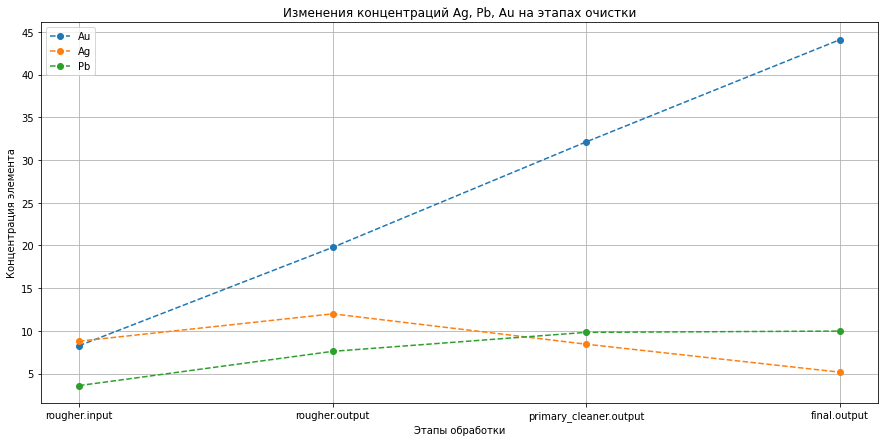

In [13]:
ax_x = ['rougher.input',
        'rougher.output',
        'primary_cleaner.output',
        'final.output']
plt.figure(figsize=(15, 7))
plt.plot(ax_x, au_concentrate_mean, 'o--', label='Au')
plt.plot(ax_x, ag_concentrate_mean, 'o--', label='Ag')
plt.plot(ax_x, pb_concentrate_mean, 'o--', label='Pb')
plt.title('Изменения концентраций Ag, Pb, Au на этапах очистки')
plt.xlabel('Этапы обработки')
plt.ylabel('Концентрация элемента')
plt.legend()
plt.grid()
plt.show()

Проанализируем концентрацию каждого металла по отдельности:

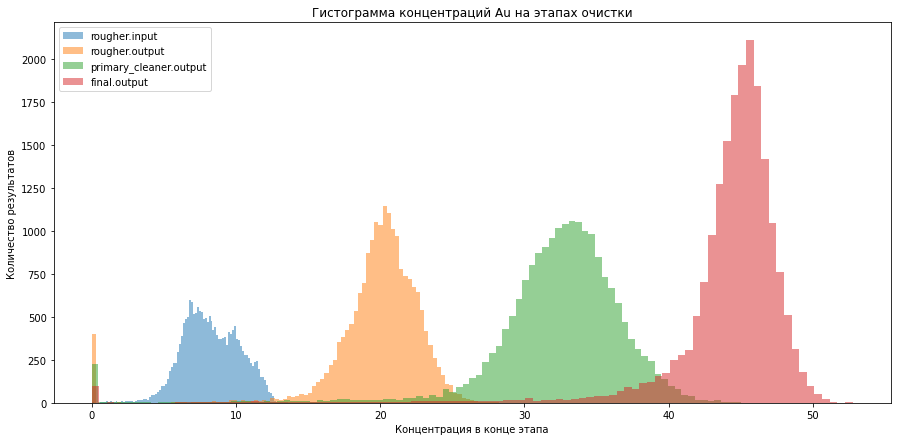

In [14]:
plt.figure(figsize=(15,7))
plt.hist(au_concentrate['rougher.input.feed_au'], bins=100, label = ax_x[0], alpha=.5)
plt.hist(au_concentrate['rougher.output.concentrate_au'], bins=100, label = ax_x[1], alpha=.5)
plt.hist(au_concentrate['primary_cleaner.output.concentrate_au'], bins=100, label = ax_x[2], alpha=.5)
plt.hist(au_concentrate['final.output.concentrate_au'], bins=100, label = ax_x[3], alpha=.5)


plt.title('Гистограмма концентраций Au на этапах очистки')
plt.xlabel('Концентрация в конце этапа')
plt.ylabel('Количество результатов')
plt.legend()
plt.show()

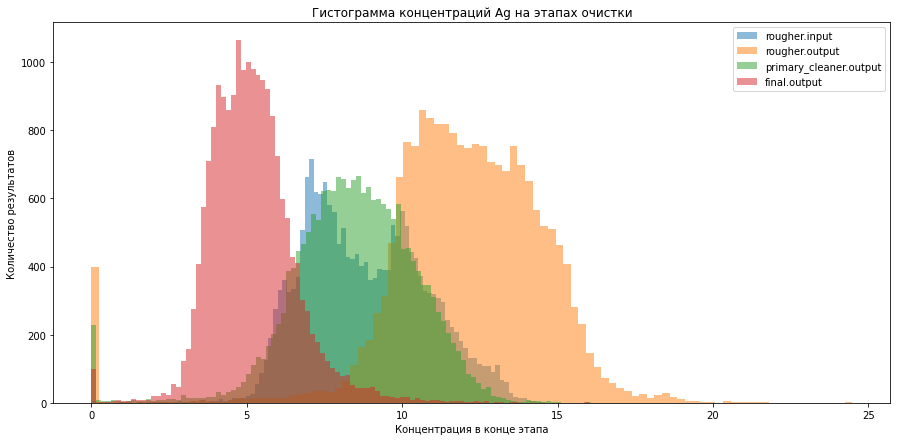

In [15]:
plt.figure(figsize=(15,7))
plt.hist(ag_concentrate['rougher.input.feed_ag'], bins=100, label = ax_x[0], alpha=.5)
plt.hist(ag_concentrate['rougher.output.concentrate_ag'], bins=100, label = ax_x[1], alpha=.5)
plt.hist(ag_concentrate['primary_cleaner.output.concentrate_ag'], bins=100, label = ax_x[2], alpha=.5)
plt.hist(ag_concentrate['final.output.concentrate_ag'], bins=100, label = ax_x[3], alpha=.5)


plt.title('Гистограмма концентраций Ag на этапах очистки')
plt.xlabel('Концентрация в конце этапа')
plt.ylabel('Количество результатов')
plt.legend()
plt.show()

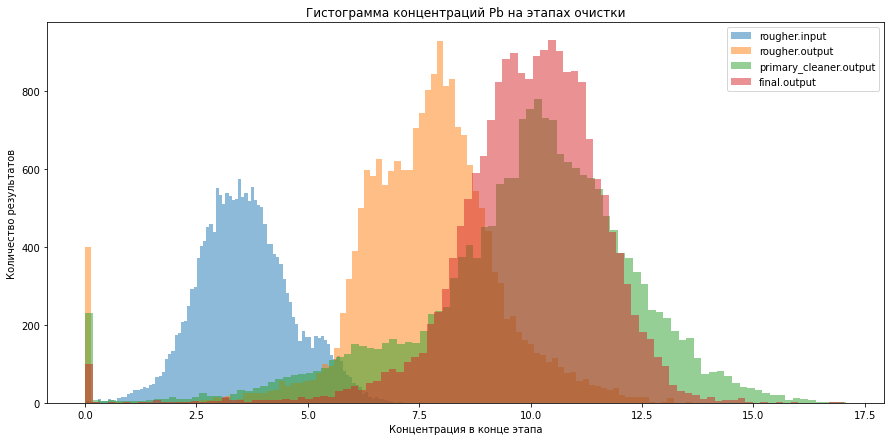

In [16]:
plt.figure(figsize=(15,7))
plt.hist(pb_concentrate['rougher.input.feed_pb'], bins=100, label = ax_x[0], alpha=.5)
plt.hist(pb_concentrate['rougher.output.concentrate_pb'], bins=100, label = ax_x[1], alpha=.5)
plt.hist(pb_concentrate['primary_cleaner.output.concentrate_pb'], bins=100, label = ax_x[2], alpha=.5)
plt.hist(pb_concentrate['final.output.concentrate_pb'], bins=100, label = ax_x[3], alpha=.5)


plt.title('Гистограмма концентраций Pb на этапах очистки')
plt.xlabel('Концентрация в конце этапа')
plt.ylabel('Количество результатов')
plt.legend()
plt.show()

Вывод: 
- Концентрация Au растет на каждой стадии и в конечном итоге становится более чем в 4 раза больше начальной
- Концентрация Ag растет после стадии флотации, но затем убывает после этапов очистки. В итоге концентрация Ag уменьшается примерно в 2 раза
- Концентрация Pb растет в процессе обработки, но не так сильно как Au. В итоге концентрация Pb увеличивается примерно в 3 раза

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

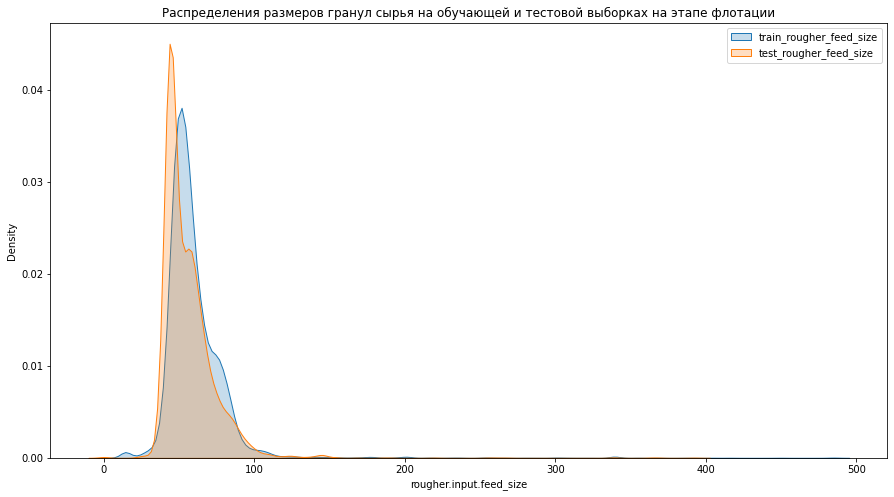

In [17]:
train_rougher_feed_size = train['rougher.input.feed_size']
test_rougher_feed_size = test['rougher.input.feed_size']

plt.figure(figsize=(15, 8))
sns.kdeplot(train_rougher_feed_size, shade = True, legend=True)
sns.kdeplot(test_rougher_feed_size, shade = True, legend=True)

plt.legend(labels=["train_rougher_feed_size", "test_rougher_feed_size"])
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации')
plt.show()

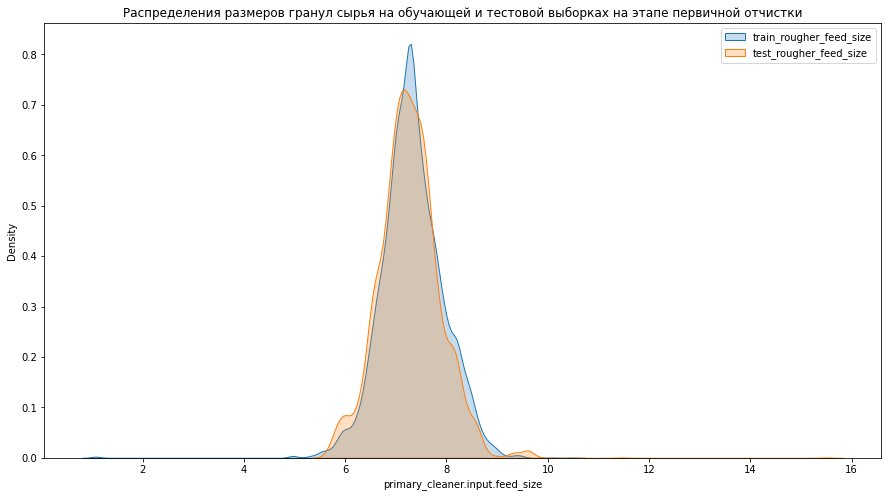

In [18]:
train_rougher_feed_size = train['primary_cleaner.input.feed_size']
test_rougher_feed_size = test['primary_cleaner.input.feed_size']

plt.figure(figsize=(15, 8))
sns.kdeplot(train_rougher_feed_size, shade = True, legend=True)
sns.kdeplot(test_rougher_feed_size, shade = True, legend=True)

plt.legend(labels=["train_rougher_feed_size", "test_rougher_feed_size"])
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе первичной отчистки')
plt.show()

Выводы:
- Виды распределения размеров гранул на этапе флотации и первичной обработки похожи,  не считая незначительного смещения. 
- Распределение размеров гранул на этапе первичной очистки похоже на нормальное, на тестовой выборке объекты сконцентрированы в отрезке [6.5, 8.0], это свидетельствует о более-менее одинаковом размере гранул на этом этапе.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [19]:
state_concentrate = pd.DataFrame()

state_concentrate['rougher.input'] = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] \
+ full['rougher.input.feed_sol'] + full['rougher.input.feed_au']

state_concentrate['rougher.output'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] \
+ full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']

state_concentrate['primary_cleaner.output'] = full['primary_cleaner.output.concentrate_ag'] \
+ full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] \
+ full['primary_cleaner.output.concentrate_au']

state_concentrate['final.output'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] \
+ full['final.output.concentrate_sol'] + full['final.output.concentrate_au']

state_concentrate.describe()

,rougher.input,rougher.output,primary_cleaner.output,final.output
count,19245.000000,19416.000000,19069.000000,19227.000000
mean,57.407926,68.188914,60.949928,68.727562
std,7.165219,12.478522,9.953770,7.423741
min,0.040000,0.000000,0.000000,0.000000
25%,53.660745,66.026048,59.165854,67.985659
50%,57.647093,70.186130,62.615189,69.632597
75%,62.012223,74.362878,65.725507,71.390461
max,76.978947,88.140119,80.749343,80.210644


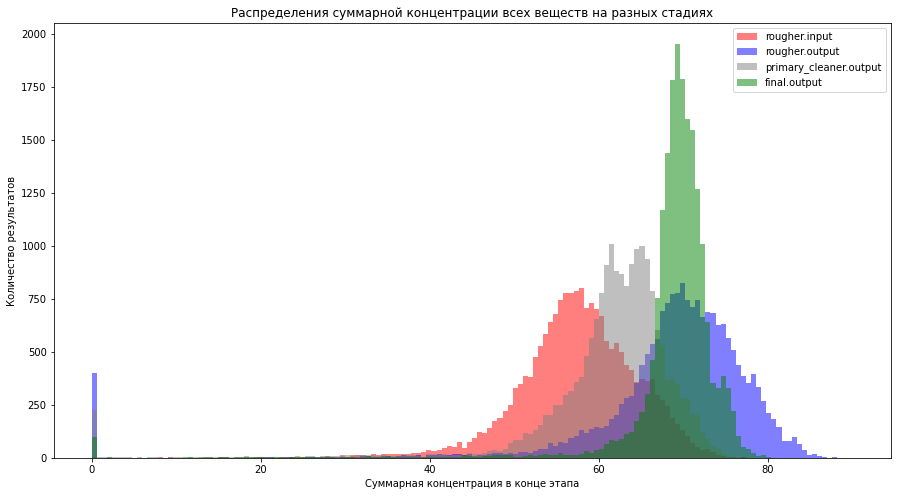

In [20]:
y1 = state_concentrate['rougher.input']
y2 = state_concentrate['rougher.output']
y3 = state_concentrate['primary_cleaner.output']
y4 = state_concentrate['final.output']

plt.figure(figsize=(15, 8))
plt.hist(y1, bins=150, color='red', label='rougher.input', range=(0, 90), alpha=0.5)
plt.hist(y2, bins=150, color='blue', label='rougher.output', range=(0, 90), alpha=0.5)
plt.hist(y3, bins=150, color='grey', label='primary_cleaner.output', range=(0, 90), alpha=0.5)
plt.hist(y4, bins=150, color='green', label='final.output', range=(0, 90), alpha=0.5)
plt.legend()
plt.xlabel('Суммарная концентрация в конце этапа')
plt.ylabel('Количество результатов')
plt.title('Распределения суммарной концентрации всех веществ на разных стадиях')
plt.show()

Выводы:
- Есть выброс у нуля. Удалим эти выбросы из всех выборок, чтобы учитывать только эффективные заборы руды.
- На этапе `final.output` концентрация распределенна вокруг максимума в очень узком пике, по сравнению с предыдущими стадиями
- Суммарная концентрация после финальной стадии распределена в узком промежутке, в отличии от начальных значений

In [21]:
full = full[(full['rougher.input.feed_ag'] >= 1) &
            (full['rougher.input.feed_pb'] >= 1) &
            (full['rougher.input.feed_sol'] >= 1) &
            (full['rougher.input.feed_au'] >= 1) &
            (full['rougher.output.concentrate_ag'] >= 1) &
            (full['rougher.output.concentrate_pb'] >= 1) &
            (full['rougher.output.concentrate_sol'] >= 1) &
            (full['rougher.output.concentrate_au'] >= 1) &
            (full['primary_cleaner.output.concentrate_ag'] >= 1) &
            (full['primary_cleaner.output.concentrate_pb'] >= 1) &
            (full['primary_cleaner.output.concentrate_sol'] >= 1) &
            (full['primary_cleaner.output.concentrate_au'] >= 1) &
            (full['final.output.concentrate_ag'] >= 1) &
            (full['final.output.concentrate_pb'] >= 1) &
            (full['final.output.concentrate_sol'] >= 1) &
            (full['final.output.concentrate_au'] >= 1)]

In [22]:
train = train[(train['rougher.input.feed_ag'] >= 1) &
              (train['rougher.input.feed_pb'] >= 1) &
              (train['rougher.input.feed_sol'] >= 1) &
              (train['rougher.input.feed_au'] >= 1) &
              (train['rougher.output.concentrate_ag'] >= 1) &
              (train['rougher.output.concentrate_pb'] >= 1) &
              (train['rougher.output.concentrate_sol'] >= 1) &
              (train['rougher.output.concentrate_au'] >= 1) &
              (train['primary_cleaner.output.concentrate_ag'] >= 1) &
              (train['primary_cleaner.output.concentrate_pb'] >= 1) &
              (train['primary_cleaner.output.concentrate_sol'] >= 1) &
              (train['primary_cleaner.output.concentrate_au'] >= 1) &
              (train['final.output.concentrate_ag'] >= 1) &
              (train['final.output.concentrate_pb'] >= 1) &
              (train['final.output.concentrate_sol'] >= 1) &
              (train['final.output.concentrate_au'] >= 1)]

In [23]:
test = test[(test['rougher.input.feed_ag'] >= 1) &
            (test['rougher.input.feed_pb'] >= 1) &
            (test['rougher.input.feed_sol'] >= 1) &
            (test['rougher.input.feed_au'] >= 1)]

**Вывод:**
- Концентрация Au растет на каждой стадии и в конечном итоге становится более чем в 4 раза больше начальной
- В итоге концентрация Ag уменьшается примерно в 2 раза
- Концентрация Pb растет в процессе обработки. В итоге концентрация Pb увеличивается примерно в 3 раза
- Виды распределения размеров гранул на этапе флотации и первичной обработки похожи,  не считая незначительного смещения.
- Удалены выбросы у нуля из всех выборок, чтобы учитывать только эффективные заборы руды.
- на этапе `final.output` концентрация распределенна вокруг максимума в очень узком пике, по сравнению с предыдущими стадиями

## Модель

In [24]:
def sMAPE_calc(target, predict):
    return np.mean(abs(target - predict) / ((abs(target) + abs(predict)) / 2)) * 100
    
def final_sMAPE(rougher, final):
    return 0.25*rougher + 0.75*final


### Обучение моделей. Оценка качества. Выбор лучшей модели и её проверка

Разобьем выборку на признаки

In [25]:
columns = train[missed_attributes].columns.to_list() + ['rougher.output.recovery', 'final.output.recovery']
features_train = train.drop(columns=columns, axis=1)

In [26]:
target_train_rougher = np.array(train['rougher.output.recovery'])
target_train_final = np.array(train['final.output.recovery'])

for sample in [features_train, target_train_rougher, target_train_final]:
    print(sample.shape)

(13323, 52)
(13323,)
(13323,)


In [27]:
lin_regressor_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=12345)
forest_model = RandomForestRegressor(random_state=12345)

In [28]:
tree_params = {'max_depth': list(np.arange(4, 10))}
forest_params = {'n_estimators': list(np.arange(30, 80, 10)), 'max_depth': list(np.arange(4, 10))}
lin_reg_params = {}

sMAPE_score = make_scorer(sMAPE_calc, greater_is_better = False)

In [29]:
rougher_forest = RandomizedSearchCV(forest_model, forest_params, n_iter=100, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)
final_forest = RandomizedSearchCV(forest_model, forest_params, n_iter=100, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)

rougher_forest.fit(features_train, target_train_rougher)
final_forest.fit(features_train, target_train_final)
best_score_rougher_forest = -rougher_forest.best_score_
best_score_final_forest = -final_forest.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START max_depth=4, n_estimators=30...............................
[CV 1/3; 1/30] END .............max_depth=4, n_estimators=30; total time=   3.2s
[CV 2/3; 1/30] START max_depth=4, n_estimators=30...............................
[CV 2/3; 1/30] END .............max_depth=4, n_estimators=30; total time=   3.1s
[CV 3/3; 1/30] START max_depth=4, n_estimators=30...............................
[CV 3/3; 1/30] END .............max_depth=4, n_estimators=30; total time=   3.3s
[CV 1/3; 2/30] START max_depth=4, n_estimators=40...............................
[CV 1/3; 2/30] END .............max_depth=4, n_estimators=40; total time=   4.2s
[CV 2/3; 2/30] START max_depth=4, n_estimators=40...............................
[CV 2/3; 2/30] END .............max_depth=4, n_estimators=40; total time=   4.2s
[CV 3/3; 2/30] START max_depth=4, n_estimators=40...............................
[CV 3/3; 2/30] END .............max_depth=4, n_e

In [30]:
rougher_tree = RandomizedSearchCV(tree_model,  tree_params, n_iter=100, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)
final_tree = RandomizedSearchCV(tree_model,  tree_params, n_iter=100, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)

rougher_tree.fit(features_train, target_train_rougher)
final_tree.fit(features_train, target_train_final)
best_score_rougher_tree = -rougher_tree.best_score_
best_score_final_tree = -final_tree.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_depth=4.................................................
[CV 1/3; 1/6] END ...............................max_depth=4; total time=   0.2s
[CV 2/3; 1/6] START max_depth=4.................................................
[CV 2/3; 1/6] END ...............................max_depth=4; total time=   0.2s
[CV 3/3; 1/6] START max_depth=4.................................................
[CV 3/3; 1/6] END ...............................max_depth=4; total time=   0.2s
[CV 1/3; 2/6] START max_depth=5.................................................
[CV 1/3; 2/6] END ...............................max_depth=5; total time=   0.2s
[CV 2/3; 2/6] START max_depth=5.................................................
[CV 2/3; 2/6] END ...............................max_depth=5; total time=   0.2s
[CV 3/3; 2/6] START max_depth=5.................................................
[CV 3/3; 2/6] END ...............................

In [31]:
rougher_lin_reg = RandomizedSearchCV(lin_regressor_model,  lin_reg_params, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)
final_lin_reg = RandomizedSearchCV(lin_regressor_model,  lin_reg_params, n_jobs=-1, cv=3, verbose=10, scoring=sMAPE_score)

rougher_lin_reg.fit(features_train, target_train_rougher)
final_lin_reg.fit(features_train, target_train_final)
best_score_rougher_lin_reg = -rougher_lin_reg.best_score_
best_score_final_lin_reg = -final_lin_reg.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START ............................................................
[CV 1/3; 1/1] END ........................................... total time=   0.2s
[CV 2/3; 1/1] START ............................................................
[CV 2/3; 1/1] END ........................................... total time=   0.3s
[CV 3/3; 1/1] START ............................................................
[CV 3/3; 1/1] END ........................................... total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START ............................................................
[CV 1/3; 1/1] END ........................................... total time=   0.3s
[CV 2/3; 1/1] START ............................................................
[CV 2/3; 1/1] END ........................................... total time=   0.2s
[CV 3/3; 1/1] START ....................................................

In [32]:
print('по модели RandomForest лучший результат rougher =', best_score_rougher_forest)
print('по модели DecisionTree лучший результат rougher =', best_score_rougher_tree)
print('по модели LinearRegression лучший результат rougher =', best_score_rougher_lin_reg)
print()
print('по модели RandomForest лучший результат final =', best_score_final_forest)
print('по модели DecisionTree лучший результат final =', best_score_final_tree)
print('по модели LinearRegression лучший результат final =', best_score_final_lin_reg)

по модели RandomForest лучший результат rougher = 7.707410809926423
по модели DecisionTree лучший результат rougher = 8.209069663941131
по модели LinearRegression лучший результат rougher = 9.922210439689934

по модели RandomForest лучший результат final = 9.660491593438929
по модели DecisionTree лучший результат final = 11.257169552518278
по модели LinearRegression лучший результат final = 13.094243258694126


In [33]:
fsMAPE_forest = final_sMAPE(best_score_rougher_forest, best_score_final_forest)
print('по модели RandomForest итоговое sMAPE =', fsMAPE_forest)

fsMAPE_tree = final_sMAPE(best_score_rougher_tree, best_score_final_tree)
print('по модели DecisionTree итоговое sMAPE =', fsMAPE_tree)

fsMAPE_lin_reg = final_sMAPE(best_score_rougher_lin_reg, best_score_final_lin_reg)
print('по модели LinearRegression итоговое sMAPE =', fsMAPE_lin_reg)

по модели RandomForest итоговое sMAPE = 9.172221397560802
по модели DecisionTree итоговое sMAPE = 10.49514458037399
по модели LinearRegression итоговое sMAPE = 12.301235053943078


Вывод: Лучше всего себя проявила модель `RandomForest`, у которой получилось лучшее значение метрики sMAPE (12.301 и 13.094). Эту модель будем использовать в дальнейшем

In [34]:
features_test = np.array(test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1))
target_test_rouger = np.array(test['rougher.output.recovery'])
target_test_final = np.array(test['final.output.recovery'])

test_rougher = rougher_forest.predict(features_test) 
test_final = final_forest.predict(features_test)

rouger_smape_test = sMAPE_calc(target_test_rouger, test_rougher)
final_smape_test = sMAPE_calc(target_test_final, test_final)

final_smape = final_sMAPE(rouger_smape_test, final_smape_test)
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке =', round(final_smape,3))

Симметричная средняя абсолютная процентная ошибка на тестовой выборке = 9.104


Проверим модель на адекватность: 

In [35]:
def dummy_pred(features_train, target_train, features_test):
    
    dummy_reg = DummyRegressor(strategy='mean')
    dummy_reg.fit(features_train, target_train)
    return dummy_reg.predict(features_test)

In [36]:
dummy_test_rougher = dummy_pred(features_train, target_train_rougher, features_test)
dummy_test_final = dummy_pred(features_train, target_train_final, features_test)

dummy_rouger_smape_test = sMAPE_calc(target_test_rouger, dummy_test_rougher)
dummy_final_smape_test = sMAPE_calc(target_test_final, dummy_test_final)

dummy_final_smape = final_sMAPE(dummy_rouger_smape_test, dummy_final_smape_test)
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке =', round(dummy_final_smape,3))

Симметричная средняя абсолютная процентная ошибка на тестовой выборке = 9.635


**Вывод: На тренировочной выборке обученно 3 модели - `RandomForestRegressor`, `DecisionTreeRegressor` и `LinearRegression` с применением кросс-валидации. Случайный лес показал лучшие метрики качества. sMAPE на тестовой выборке - 9.104. Так же выбранная модель получила результаты выше чем константная модель `DummyRegressor`, следовательно доказана разумность ее использования**

## Общий вывод

Моделью машинного обучения для данного проекта является `RandomForestRegressor`, так как эта модель предсказывает коэффициент восстановления золота из руды наилучшим образом. Так же выбранная модель получила результаты выше чем константная модель DummyRegressor, следовательно доказана разумность ее использования.